<a href="https://colab.research.google.com/github/Armin-Abdollahi/Machine-Learning/blob/main/ML_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

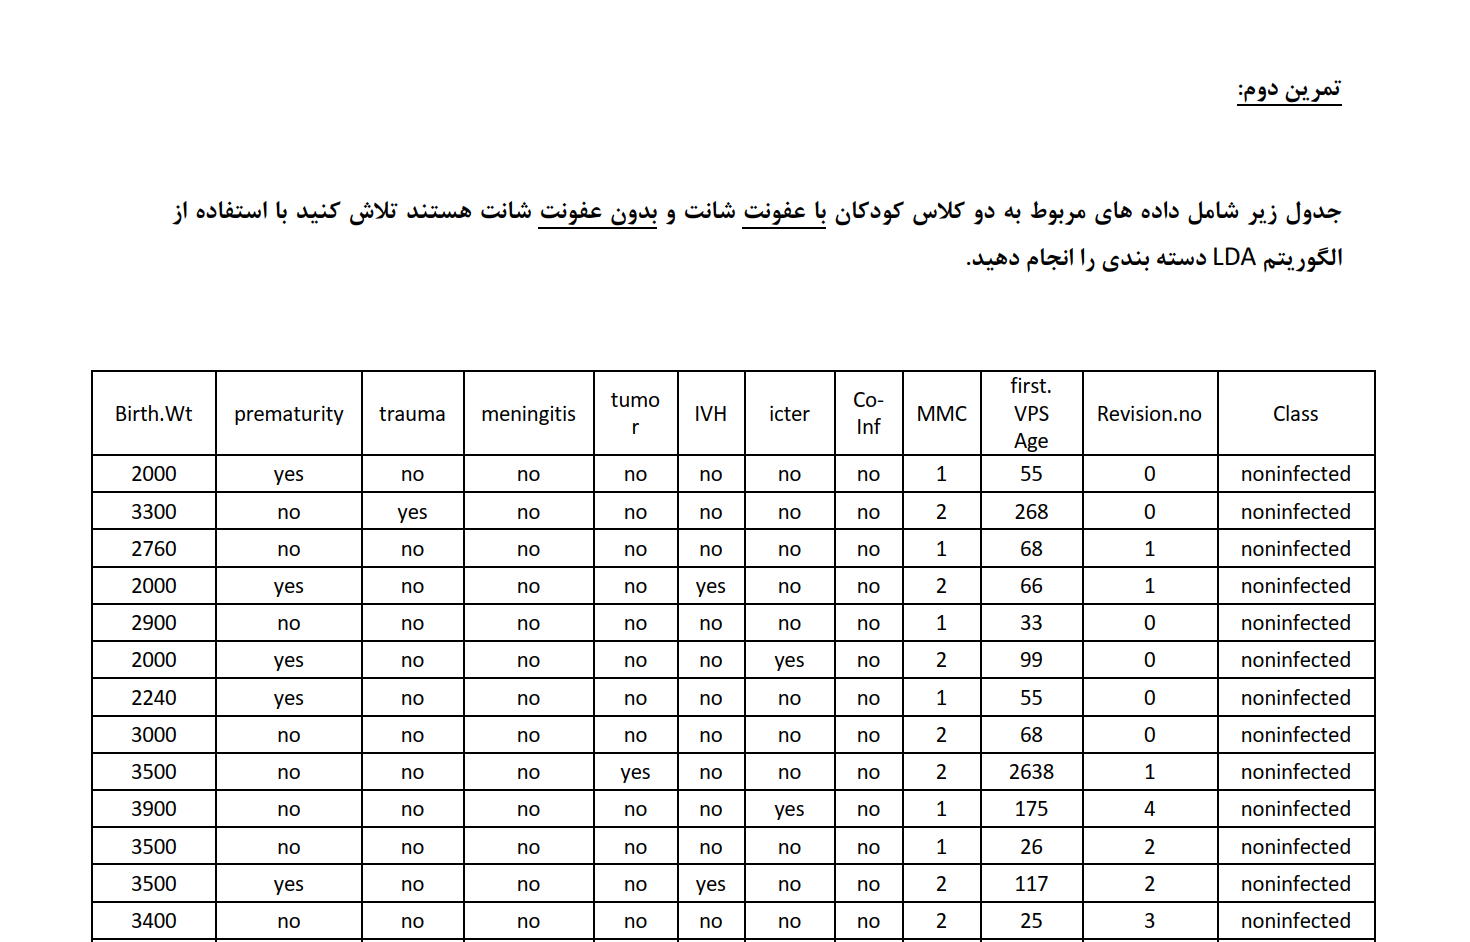

In [1]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load data from CSV
df = pd.read_csv('/content/drive/MyDrive/ML_Assignment/Data.csv')

In [4]:
# Print columns to verify correct loading
print(df.columns)

Index(['Birth.Wt', 'prematurity', 'trauma', 'meningitis', 'tumor', 'IVH',
       'icter', 'Co-Inf', 'MMC', 'first. VPS Age', 'Revision.no', 'Class'],
      dtype='object')


In [5]:
# Replace '#NULL!' and other non-numeric placeholders with NaN
df.replace('#NULL!', pd.NA, inplace=True)

In [6]:
# Optionally, drop rows with NaN values or handle them appropriately
df.dropna(inplace=True)  # This will remove any rows containing NaN values

In [7]:
# Define the categorical columns that actually exist in your DataFrame
categorical_columns = ['prematurity', 'trauma', 'meningitis', 'tumor', 'IVH', 'icter', 'Co-Inf']

In [8]:
# Convert only the existing categorical columns to numerical ones using get_dummies
df = pd.get_dummies(df, columns=categorical_columns)

In [9]:
# Separating features and labels
X = df.drop('Class', axis=1)
y = df['Class']

In [10]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Apply LDA algorithm
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

In [13]:
# Make predictions
y_pred = lda.predict(X_test_scaled)

In [14]:
# Evaluate model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[12  7]
 [ 6 19]]

Classification Report:
              precision    recall  f1-score   support

    infected       0.67      0.63      0.65        19
 noninfected       0.73      0.76      0.75        25

    accuracy                           0.70        44
   macro avg       0.70      0.70      0.70        44
weighted avg       0.70      0.70      0.70        44



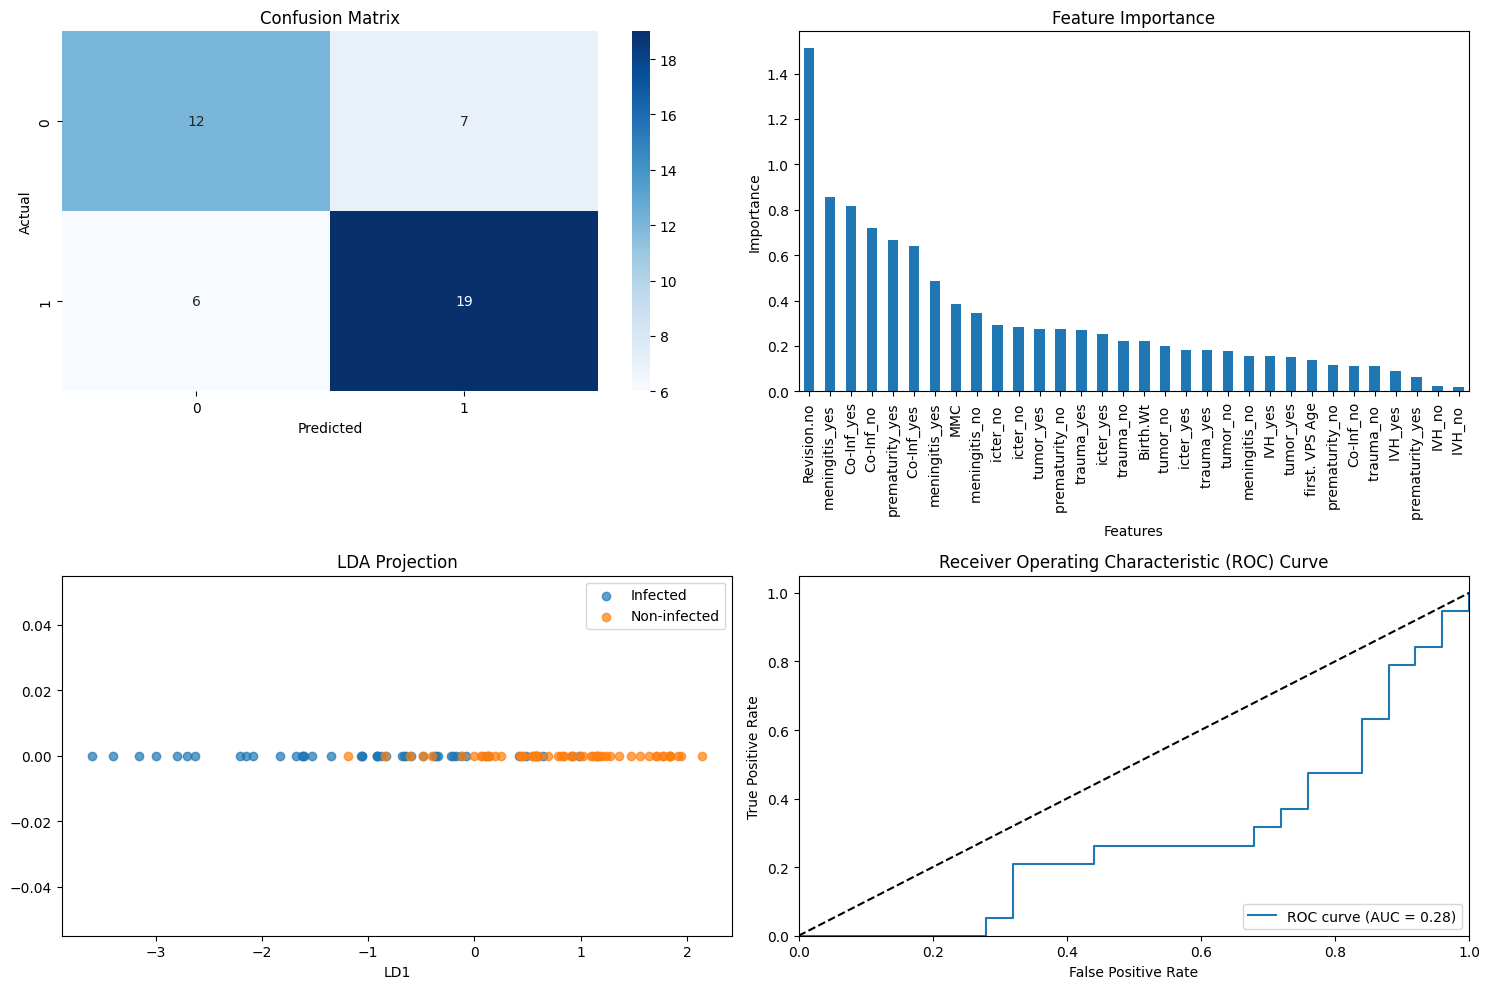

In [15]:
# Visualizations
plt.figure(figsize=(15, 10))

# 1. Confusion Matrix Heatmap
plt.subplot(2, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 2. Feature Importance
plt.subplot(2, 2, 2)
feature_importance = pd.Series(abs(lda.coef_[0]), index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)

# 3. LDA Projection
plt.subplot(2, 2, 3)
X_lda = lda.transform(X_train_scaled)
plt.scatter(X_lda[y_train == 'infected'], [0] * sum(y_train == 'infected'), label='Infected', alpha=0.7)
plt.scatter(X_lda[y_train == 'noninfected'], [0] * sum(y_train == 'noninfected'), label='Non-infected', alpha=0.7)
plt.title('LDA Projection')
plt.xlabel('LD1')
plt.legend()

# 4. ROC Curve
plt.subplot(2, 2, 4)
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test == 'infected', lda.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()